### Central Limit Theorem

The CLT states that the **sum** or **average** of a large number of **independent, idnetically distributed** random variables will approximate a **normal distribution**, regardless of the original distribution - provided that the sample size is large enough.

---
### Binomial Distibution

- Each trial in **Bernoulli random variable** (0 or 1).

- The Binomial X ~ Bin(n, p) is **the sum of n Bernoulli trials**

So, when n becomes large:
- The distribution of X becomes **approximatelly normal**.

---
### Why to use normal apporximation of Binomial Distribution

##### Computational Complexity for Large n.
When n is small (10, 20) it not tirvial to compute probabilites

#### Things get complex when we are dealing with large n values (1000, 2000, 10000, etc)

- Computing factorials in $\binom{n}{k}$ becomes computationally expensive or numerically unstable.
- It's slow or even infeasible without approximation techniques.
- Tables of exact binomial values become impractical.

#### Example of Efficiency in Practice
Imagine testing whether 520 out of 1000 people preferred Product A:

1. **Binomial**: you'd have to compute exact probabilities around P(X≥520) using binomial sums.
2. **Normal approximation**: you can compute a **z-score** and use the standard normal table — fast and accurate:

Z = $\frac{X - np}{\sqrt{np(1 - p)}}$


#### Easier Integration, Estimation, and Inference

The normal distribution is used because:

- It allows **closed-form solutions** for confidence intervals, p-values, etc.
- Its **cumulative distribution function (CDF)** is well-studied and implemented efficiently in all statistical software.
- It fits naturally with **maximum likelihood estimation, regression models, and hypothesis testing frameworks**.
---

| Reason to Approximate | Why Normal Instead of Binomial                          |
| --------------------- | ------------------------------------------------------- |
| **Large $n$**         | Binomial becomes hard to compute exactly                |
| **Ease of inference** | Z-tests, p-values, and CIs are easier with normal       |
| **CLT applies**       | Sum of binary trials ≈ normal when $n$ is large         |
| **Software support**  | Normal distribution is widely implemented and optimized |

---

### Conditions for Normal Approximation

To use **normal approximation** for a binomial distribution, both of the following conditions should be met (rule of thumb):

np ≥ 5 and n(1 - p) ≥ 5

These ensure that the distribution is not too skewed and has enough "spread."

---
#### The rule of thumb

It is not a strict mathematical theorem like the CLT itslef - instead, it is based on **empirical evidence** and **statistical reasoning** to ensure the binomial distribution is **sufficiently symmetric and smooth** for the normal approximation work well.

> **Empirical evidence** is information or data that is gathered through **observation**, **experience**, or **experiments**, rather than through theory or pure logic.

#### Why these conditions?

1. np ≥ 5: This ensures that the expected number of **successes** us not too small.
2. n(1 - p) ≥ 5: This ensures that the expected number of **failures** is also not too small.

Together, they ensure the distribution is not too skewed and has a decent spread, which helps the **bell shape** of the binomial distribuition emerge. 

Note: <em>"The normal distribution can be used to approximate the binomial distribution when the **number of trails is large** and the **probability** of success is not too close to **0 or 1**."</em>

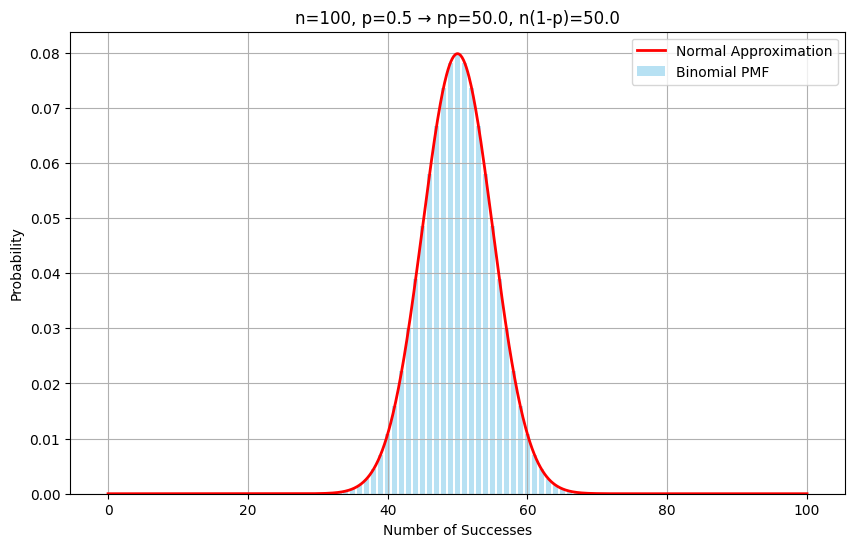

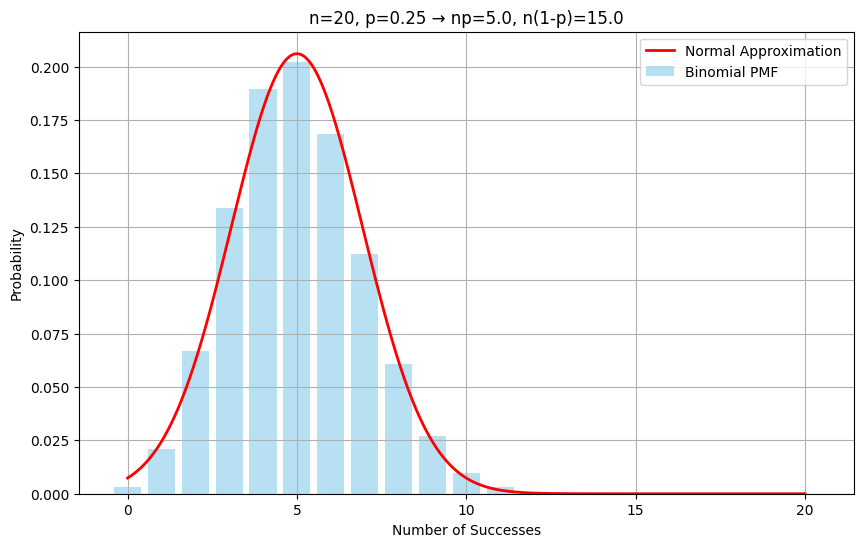

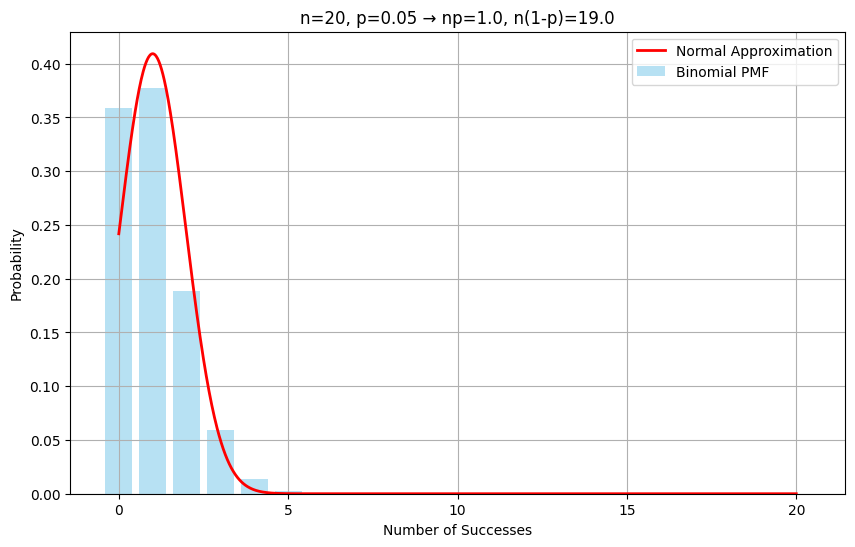

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

def plot_binomial_vs_normal(n, p):
    mu = n * p
    sigma = np.sqrt(n * p * (1 - p))
    
    # X range around the mean
    x = np.arange(0, n+1)
    
    # Binomial PMF
    binom_pmf = binom.pmf(x, n, p)
    
    # Normal approximation
    x_norm = np.linspace(0, n, 1000)
    normal_pdf = norm.pdf(x_norm, mu, sigma)
    
    plt.figure(figsize=(10, 6))
    plt.bar(x, binom_pmf, alpha=0.6, label='Binomial PMF', color='skyblue')
    plt.plot(x_norm, normal_pdf, 'r-', lw=2, label='Normal Approximation')
    
    plt.title(f'n={n}, p={p} → np={mu:.1f}, n(1-p)={n*(1-p):.1f}')
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

# Valid approximation
plot_binomial_vs_normal(n=100, p=0.5)  # np=50, n(1-p)=50 — GOOD

# Borderline case
plot_binomial_vs_normal(n=20, p=0.25)  # np=5, n(1-p)=15 — BARELY OK

# Invalid approximation
plot_binomial_vs_normal(n=20, p=0.05)  # np=1, n(1-p)=19 — BAD

# Continuity Correction in Normal Approximation of Binomial

The binomial distribution is **discrete**, meaning it’s only defined at **integer values** (e.g., 0, 1, 2, …, n).

The normal distribution is **continuous**, meaning it’s defined for all **real numbers**.

So when we **approximate a discrete distribution** **with** a **continuous** one, we use a **continuity correction** to **better match the area** (probability) **around integer values**.

### Why Add or Subtract 0.5?

The 0.5 comes from accounting for the **width of one whole unit in a discrete setting**.

##### Example:

Suppose you want to approximate:

P(X=5) where X∼Binomial(n,p)


Since **normal distributions are continuous**, there is **zero probability** at **exactly 5**. 

So we approximate:
P(X=5)≈P(4.5<Z<5.5)

##### Why 4.5 to 5.5?

You're essentially saying: the entire **"bin"** around **5** spans from **4.5 to 5.5**.

This ensures you're **capturing** the **same area** the **binomial would assign to the integer 5.**

---
# From here we go deep into mathematical expected value and vairance of Binomial distribution
---

### What is mathematical expected value of a random variable X?

<em>Definition: Mathematical expectation is just **the average value you’d expect from a random variable if you could repeat the experiment infinitely many times**.</em>

### 1. For discrete random variables.
   
If X can take values $x_1, x_2, ... x_n$ with assigned probabilities $p_1, p_2, ... p_n$

$$
E[X] =  \sum_{i=1}^nx_ip_i
$$

Example a fair die 

$$
E[X] = \frac{1 + 2 + 3 + 4 + 5 + 6}{6} = 3.5
$$

So, the average expected output value from tossing a fair die many times will tend to close to 3.5.

The population mean is denoted by $\mu$ 

Population mean = the expected value E[X] is true only if the **distribution actually has a finite expected value**.

---

#### In most common distributions - Normal, Binomial, Uniform, Poisson, Exponential, etc.

They have a **finite mean**, so the **population mean equals E[X]**, and the **sample mean converges** to it by the **Law of Large Numbers (LLN).**

#### The Law of Large Numbers says:
$\bar{X}_n \xrightarrow{\text{a.s.}} E[X] \quad \text{as } n \to \infty$

- For any distribution with a finite expected value, the sample mean will get closer to the expected value as the number of samples grows.
-  For small samples, $\bar{X}_n$ can be far from E[X] because of random fluctuations.

---

#### The Law of Large Numbers Fails When
Distributions with **no finite expected value** mean — e.g.:

- Cauchy distribution
- Pareto distribution with shape parameter α≤1α≤1
In these cases:

E[X] does not exist (integral/divergence issue)

So talking about a **“population mean”** doesn’t make sense — and the **sample mean can bounce around forever without settling.** This is where LLN does not make sense, because as n grows, in the sample there might by found a large negative/positive value which affects the E[X].

- As **n grows**, the **probability of encountering** an **extreme value** (huge positive or negative) **never becomes negligible**.
- These **extreme values** are so large that they **can completely dominate the sample mean $\bar{X}_n$,** even if you’ve already collected millions of samples.
- So instead of **$\bar{X}_n$ “settling down” around some fixed number** (as LLN predicts for finite-mean distributions), **it keeps getting knocked far away** by the next monster observation.

---


### 2. For continuous random variables (Not related to Binomial distribution)


Instead of **summing over probabilities**, we **integrate** over the **probability density function** f(x):
$E[X] = \int_{-\infty}^{\infty} x \, f(x) \, dx$

Here:
- f(x) is the PDF, with $E[X] = \int_{-\infty}^{\infty} x \, f(x) \, dx$
- The **integral plays the same role as the sum in the discrete case** — it “adds up” all possible values weighted by their **density**.

Example: If X is uniformly distributed on [0,1], f(x)=1 for 0≤x≤1:

$$
E[X] = \int_{0}^{1} x \cdot 1 \, dx 
= \left[ \frac{x^{2}}{2} \right]_{0}^{1} 
= \frac{1}{2}
$$

---

### Variance

$Var(X)=E[X^2]−(E[X])^2$